<a href="https://colab.research.google.com/github/pankovakris/coursera/blob/main/Stepik_CV_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

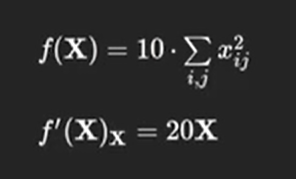

Прога для вычисления градиента для тензора по функции ^

In [45]:
x = torch.tensor( [ [1., 2., 3., 4.],
                   [5., 6., 7., 8.,],
                   [9., 10., 11., 12.]], requires_grad=True ) #задаем тензор, и сразу в requires grad указываем, что нужно будет считать градиент
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # as usual ставим девайс на гпушку если можно а если не можно то ну и ладно
x.to(device)

func = 10 * (x ** 2).sum() #создаем функцию, которая зависит от тензора
func.backward() #считаем производную для функции!
print(x.grad, '< gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) < gradient


In [46]:
x.data -= 0.001 * x.grad #обновляем внутренности тензора, тк торч не дает сделать это через просто х = по [многим причинам]

In [47]:
x.grad.zero_() #метод обнуляет градиент. функция с нижним подчеркиванием = inplace операция 

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [48]:
optimize = torch.optim.SGD([x], lr=0.001) #берем встроенный стохастический град спуск

In [49]:
def func(var):
  return 10 * (var ** 2).sum()

def make_step(func, var):
  func_res = func(var)
  func_res.backward()
  optimize.step()

for i in range(500):
  make_step(func, x)

In [35]:
def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

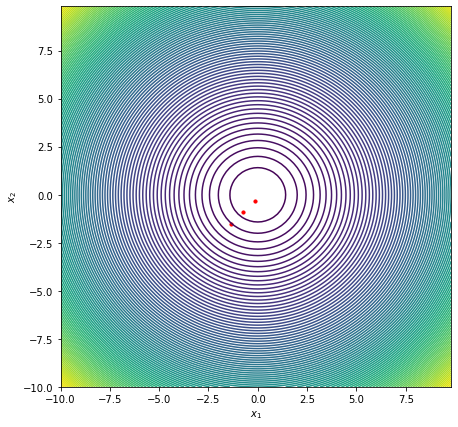

In [50]:
show_contours(func) #визуал спуска
plt.scatter(np.array(x.detach())[:,0], np.array(x.detach())[:,1], s=10, c='r'); 
plt.show()